# Исследование инвестиционных характеристик сочетания активов

## 1 Подготовительные операции

### 1.1 Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

### 1.2 Импорт и обработка входных данных

In [2]:
stocks = pd.read_excel('Data.xlsx', sheet_name = 'iShares MSCI Mexico ETF', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
stocks['DRet'] = stocks['Total Return Index (Net Dividends)'].pct_change() + 1
stocks['QDate'] = stocks['Date'].dt.to_period('Q')
group = stocks.groupby('QDate')
stocks['QRet'] = group['DRet']. transform(np.product) - 1
stocks = stocks.drop_duplicates(subset = ['QDate'], keep = 'last')
stocks = stocks[['QDate','QRet']].set_index('QDate')
stocks = stocks.rename(columns={"QRet": "Stocks"})

bonds = pd.read_excel('Data.xlsx', sheet_name = 'iShares Mexico Corporate Bond', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
bonds['DRet'] = bonds['Total Return Index (Net Dividends)'].pct_change() + 1
bonds['QDate'] = bonds['Date'].dt.to_period('Q')
group = bonds.groupby('QDate')
bonds['QRet'] = group['DRet']. transform(np.product) - 1
bonds = bonds.drop_duplicates(subset = ['QDate'], keep = 'last')
bonds = bonds[['QDate','QRet']].set_index('QDate')
bonds = bonds.rename(columns={"QRet": "Bonds"})

bitcoin = pd.read_excel('Data.xlsx', sheet_name = 'COINXBT', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
bitcoin['DRet'] = bitcoin['Total Return Index (Net Dividends)'].pct_change() + 1
bitcoin['QDate'] = bitcoin['Date'].dt.to_period('Q')
group = bitcoin.groupby('QDate')
bitcoin['QRet'] = group['DRet']. transform(np.product) - 1
bitcoin = bitcoin.drop_duplicates(subset = ['QDate'], keep = 'last')
bitcoin = bitcoin[['QDate','QRet']].set_index('QDate')
bitcoin = bitcoin.rename(columns={"QRet": "Bitcoin"})

palladium = pd.read_excel('Data.xlsx', sheet_name = 'Standard Physical Palladium', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
palladium['DRet'] = palladium['Total Return Index (Net Dividends)'].pct_change() + 1
palladium['QDate'] = palladium['Date'].dt.to_period('Q')
group = palladium.groupby('QDate')
palladium['QRet'] = group['DRet']. transform(np.product) - 1
palladium = palladium.drop_duplicates(subset = ['QDate'], keep = 'last')
palladium = palladium[['QDate','QRet']].set_index('QDate')
palladium = palladium.rename(columns={"QRet": "Palladium"})

silver = pd.read_excel('Data.xlsx', sheet_name = 'iShares Silver Trust', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
silver['DRet'] = silver['Total Return Index (Net Dividends)'].pct_change() + 1
silver['QDate'] = silver['Date'].dt.to_period('Q')
group = silver.groupby('QDate')
silver['QRet'] = group['DRet']. transform(np.product) - 1
silver = silver.drop_duplicates(subset = ['QDate'], keep = 'last')
silver = silver[['QDate','QRet']].set_index('QDate')
silver = silver.rename(columns={"QRet": "Silver"})

oil = pd.read_excel('Data.xlsx', sheet_name = 'United States Oil Fund', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
oil['DRet'] = oil['Total Return Index (Net Dividends)'].pct_change() + 1
oil['QDate'] = oil['Date'].dt.to_period('Q')
group = oil.groupby('QDate')
oil['QRet'] = group['DRet']. transform(np.product) - 1
oil = oil.drop_duplicates(subset = ['QDate'], keep = 'last')
oil = oil[['QDate','QRet']].set_index('QDate')
oil = oil.rename(columns={"QRet": "Oil"})

gold = pd.read_excel('Data.xlsx', sheet_name = 'SPDR Gold Trust', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
gold['DRet'] = gold['Total Return Index (Net Dividends)'].pct_change() + 1
gold['QDate'] = gold['Date'].dt.to_period('Q')
group = gold.groupby('QDate')
gold['QRet'] = group['DRet']. transform(np.product) - 1
gold = gold.drop_duplicates(subset = ['QDate'], keep = 'last')
gold = gold[['QDate','QRet']].set_index('QDate')
gold = gold.rename(columns={"QRet": "Gold"})

multi = pd.read_excel('Data.xlsx', sheet_name = 'IQ Hedge Multi-Strategy', usecols = ['Date', 'Total Return Index (Net Dividends)']).sort_values('Date')
multi['DRet'] = multi['Total Return Index (Net Dividends)'].pct_change() + 1
multi['QDate'] = multi['Date'].dt.to_period('Q')
group = multi.groupby('QDate')
multi['QRet'] = group['DRet']. transform(np.product) - 1
multi = multi.drop_duplicates(subset = ['QDate'], keep = 'last')
multi = multi[['QDate','QRet']].set_index('QDate')
multi = multi.rename(columns={"QRet": "Multi"})

all_rets = pd.concat([stocks, bonds, gold, silver, oil, bitcoin, palladium, multi], axis = 1)

### 1.3 Исследование попарных корреляций активов

In [3]:
all_rets.corr()

,Stocks,Bonds,Gold,Silver,Oil,Bitcoin,Palladium,Multi
Stocks,1.000000,0.906308,0.191112,0.438692,0.536182,0.245183,-0.088486,0.791551
Bonds,0.906308,1.000000,0.185845,0.433985,0.466631,0.207442,-0.036950,0.717456
Gold,0.191112,0.185845,1.000000,0.801623,-0.022139,0.000172,0.389870,0.339246
Silver,0.438692,0.433985,0.801623,1.000000,0.255925,0.029597,0.243804,0.614948
Oil,0.536182,0.466631,-0.022139,0.255925,1.000000,0.235869,0.021423,0.592046
Bitcoin,0.245183,0.207442,0.000172,0.029597,0.235869,1.000000,0.017488,0.344148
Palladium,-0.088486,-0.036950,0.389870,0.243804,0.021423,0.017488,1.000000,-0.020680
Multi,0.791551,0.717456,0.339246,0.614948,0.592046,0.344148,-0.020680,1.000000


### 1.4 Создание необходимых для анализа рядов данных

In [4]:
s_b_gold = pd.concat([stocks, bonds, gold], axis = 1)
s_b_bitcoin = pd.concat([stocks, bonds, bitcoin], axis = 1)['2015Q3':]
s_b_palladium = pd.concat([stocks, bonds, palladium], axis = 1)
s_b_gold.head()

,Stocks,Bonds,Gold
QDate,,,
2012Q1,0.130356,0.119470,0.039764
2012Q2,-0.007207,0.010563,-0.042746
2012Q3,0.064116,0.068487,0.107610
2012Q4,0.081241,0.011308,-0.057418
2013Q1,0.057563,0.064964,-0.046602


### 1.5 Создание функций для исследования инвестиционных характеристик

In [5]:
def annualize_rets(r, periods_per_year):
    
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    
    return r.std()*(periods_per_year**0.5)


def sharpe_ratio(r, riskfree_rate, periods_per_year):
    
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

def drawdown(return_series: pd.Series):
    
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

def main_func(dataframe, alt_asset_name, stock_share, start_date='2012Q1', rfr=0.05):
    
    result = dataframe.copy()
    
    alt_share = [0, 0.025, 0.05, 0.1]
    
    j = stock_share
    
    for i in alt_share:
        
        result[str('%s%% Stocks %s%% Bonds %s%% %s' % (round(100*j*(1-i),2), round(100*(1-j)*(1-i),2), round(100*i,2), alt_asset_name))] = i*dataframe[alt_asset_name] + (1-i)*j*dataframe['Stocks'] + (1-i)*(1-j)*dataframe['Bonds']
          
    result = result.drop(['Stocks', 'Bonds', alt_asset_name], axis = 1)
    
    columns = ['Cumulative Return, %', 'Annualized Return, %', 'Volatility, %', 'Sharpe Ratio', 'Maximum Drawdown, %']
    
    result2 = pd.DataFrame(index = list(result.columns), columns = columns)
    
    result3 = pd.DataFrame(columns = list(result.columns))
    
    i = 0
    
    for k in result.columns:
        
        result2.loc[k, 'Cumulative Return, %'] = round(((1+result[k]).prod()-1)*100, 2)
        result2.loc[k, 'Annualized Return, %'] = round(annualize_rets(result[k],4)*100, 2)
        result2.loc[k, 'Volatility, %'] = round(annualize_vol(result[k], 4)*100, 2)
        result2.loc[k, 'Sharpe Ratio'] = round(sharpe_ratio(result[k],rfr,4), 2)
        result2.loc[k, 'Maximum Drawdown, %'] = round(drawdown(result[k])['Drawdown'].min()*100, 2)
    
        result3[k] = drawdown(result[k])['Wealth']
    
    return result3, result2

## 2. Рассмотрение различных сочетаний активов

## 2.1 Золото в сочетании с акциями и облигациями

### 2.1.1 Портфель акции/облигации в соотношении 80/20 в сочетании с золотом

In [6]:
gold_80_1, gold_80_2 = main_func(s_b_gold, alt_asset_name = 'Gold', stock_share = 0.8)

#### Инвестиционные характеристики портфелей, 1 Января 2012 - 31 декабря 2020

In [7]:
gold_80_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
80.0% Stocks 20.0% Bonds 0% Gold,-0.26,-0.03,20.99,-0.23,-50.9
78.0% Stocks 19.5% Bonds 2.5% Gold,0.79,0.09,20.55,-0.23,-49.78
76.0% Stocks 19.0% Bonds 5.0% Gold,1.8,0.2,20.11,-0.23,-48.64
72.0% Stocks 18.0% Bonds 10.0% Gold,3.74,0.41,19.25,-0.23,-46.36


#### Индекс полной доходности, 1000 - базовое значение, 1 Января 2012 - 31 декабря 2020

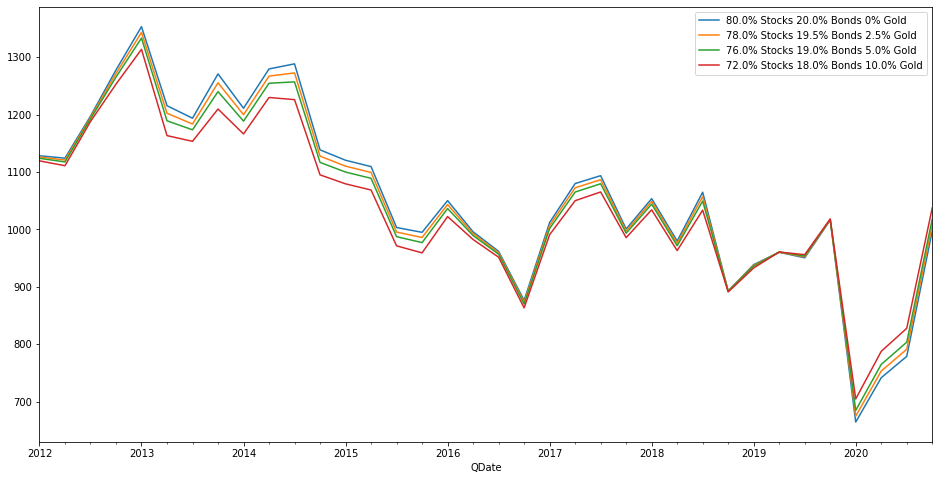

In [8]:
gold_80_1.plot(figsize=(16,8))

### 2.1.2 Портфель акции/облигации в соотношении 70/30 в сочетании с золотом

In [9]:
gold_70_1, gold_70_2 = main_func(s_b_gold, alt_asset_name = 'Gold', stock_share = 0.7)

#### Инвестиционные характеристики портфелей, 1 Января 2012 - 31 декабря 2020

In [10]:
gold_70_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
70.0% Stocks 30.0% Bonds 0% Gold,3.53,0.39,20.19,-0.22,-48.14
68.25% Stocks 29.25% Bonds 2.5% Gold,4.48,0.49,19.77,-0.22,-47.04
66.5% Stocks 28.5% Bonds 5.0% Gold,5.39,0.58,19.35,-0.22,-45.94
63.0% Stocks 27.0% Bonds 10.0% Gold,7.11,0.77,18.53,-0.22,-43.73


#### Индекс полной доходности, 1000 - базовое значение, 1 Января 2012 - 31 декабря 2020

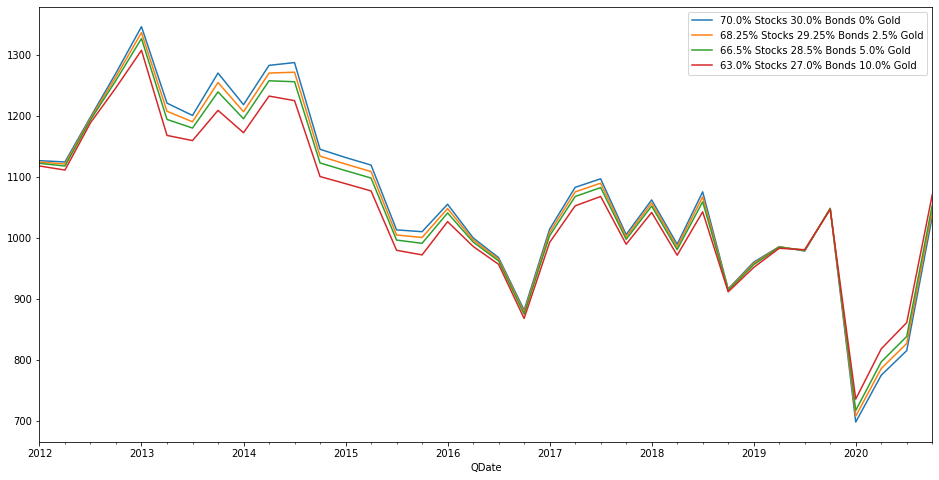

In [11]:
gold_70_1.plot(figsize=(16,8))

### 2.1.3 Портфель акции/облигации в соотношении 60/40 в сочетании с золотом

In [12]:
gold_60_1, gold_60_2 = main_func(s_b_gold, alt_asset_name = 'Gold', stock_share = 0.6)

#### Инвестиционные характеристики портфелей, 1 Января 2012 - 31 декабря 2020

In [13]:
gold_60_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
60.0% Stocks 40.0% Bonds 0% Gold,7.34,0.79,19.42,-0.21,-45.27
58.5% Stocks 39.0% Bonds 2.5% Gold,8.17,0.88,19.01,-0.21,-44.21
57.0% Stocks 38.0% Bonds 5.0% Gold,8.98,0.96,18.61,-0.21,-43.15
54.0% Stocks 36.0% Bonds 10.0% Gold,10.48,1.11,17.84,-0.21,-41.01


#### Индекс полной доходности, 1000 - базовое значение, 1 Января 2012 - 31 декабря 2020

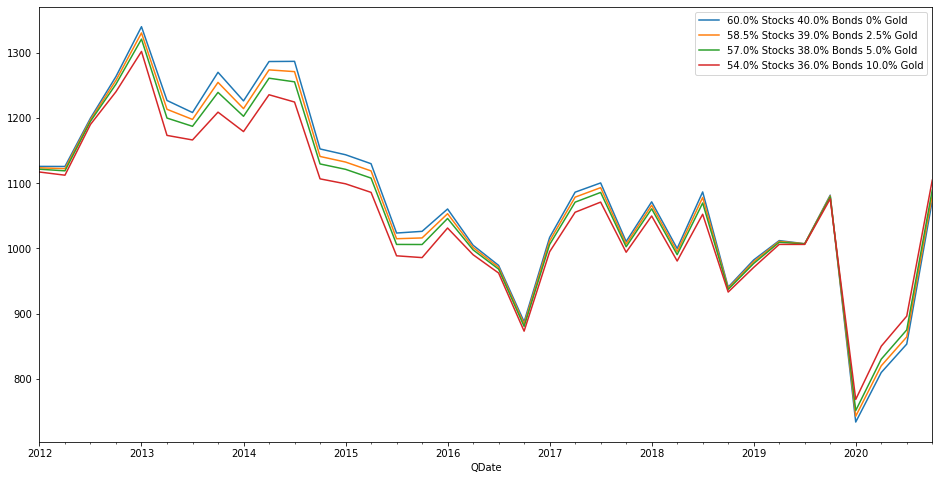

In [14]:
gold_60_1.plot(figsize=(16,8))

### 2.1.4 Портфель акции/облигации в соотношении 50/50 в сочетании с золотом

In [15]:
gold_50_1, gold_50_2 = main_func(s_b_gold, alt_asset_name = 'Gold', stock_share = 0.5)

#### Инвестиционные характеристики портфелей, 1 Января 2012 - 31 декабря 2020

In [16]:
gold_50_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
50.0% Stocks 50.0% Bonds 0% Gold,11.15,1.18,18.68,-0.2,-42.31
48.75% Stocks 48.75% Bonds 2.5% Gold,11.87,1.25,18.29,-0.2,-41.29
47.5% Stocks 47.5% Bonds 5.0% Gold,12.57,1.32,17.91,-0.2,-40.27
45.0% Stocks 45.0% Bonds 10.0% Gold,13.86,1.45,17.17,-0.2,-38.22


#### Индекс полной доходности, 1000 - базовое значение, 1 Января 2012 - 31 декабря 2020

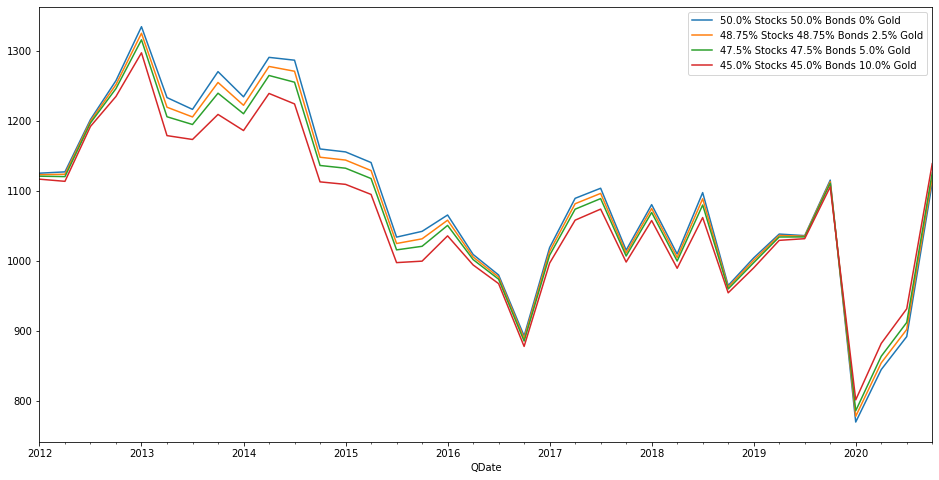

In [17]:
gold_50_1.plot(figsize=(16,8))

### 2.1.5 Портфель акции/облигации в соотношении 40/60 в сочетании с золотом

In [18]:
gold_40_1, gold_40_2 = main_func(s_b_gold, alt_asset_name = 'Gold', stock_share = 0.4)

#### Инвестиционные характеристики портфелей, 1 Января 2012 - 31 декабря 2020

In [19]:
gold_40_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
40.0% Stocks 60.0% Bonds 0% Gold,14.95,1.56,17.97,-0.19,-39.26
39.0% Stocks 58.5% Bonds 2.5% Gold,15.57,1.62,17.6,-0.19,-38.28
38.0% Stocks 57.0% Bonds 5.0% Gold,16.15,1.68,17.24,-0.19,-37.3
36.0% Stocks 54.0% Bonds 10.0% Gold,17.22,1.78,16.54,-0.19,-35.34


#### Индекс полной доходности, 1000 - базовое значение, 1 Января 2012 - 31 декабря 2020

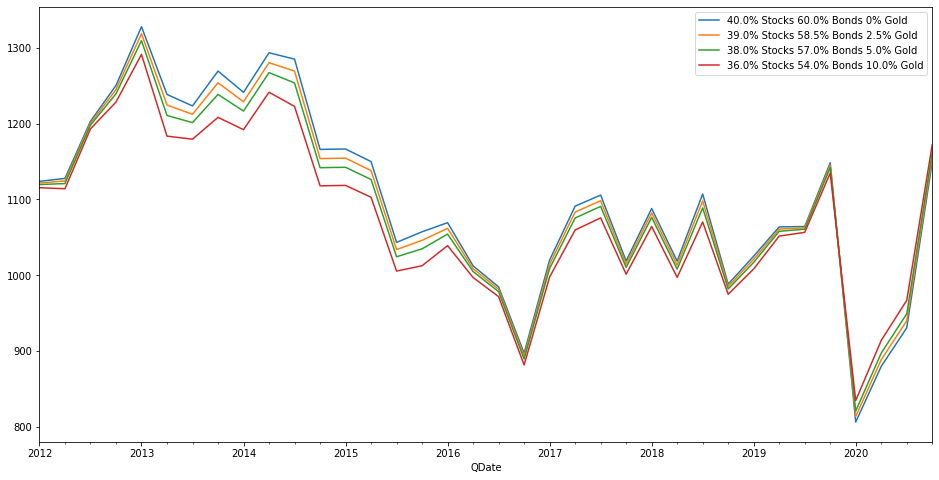

In [20]:
gold_40_1.plot(figsize=(16,8))

### 2.1.6 Комментарии

- Мексиканский фондовый рынок в рассматриваемом периоде проявил себя очень слабо, даже учитывая рассмотрение индекса полной доходности. Причем ETF на акции показал доходность ниже (а волатильность выше), чем ETF на облигации, поэтому снижение доли акций в портфеле благоприятно влияет на все инвестиционные характеристики: доходность возрастает, волатильность снижается, максимальная просадка уменьшается, коэффициент Шарпа возрастает, хотя в любом случае остается в отрицательной зоне.

- Рост доли золота в портфеле также позволяет незначительно улучшить все его инвестиционные характеристики, чего можно было ожидать, учитывая низкую корреляцию активов и более высокую доходность ETF на золото за рассматриваемый период.

## 2.2 Биткоин в сочетании с акциями и облигациями

### 2.2.1 Портфель акции/облигации в соотношении 80/20 в сочетании с биткоином

In [21]:
bitcoin_80_1, bitcoin_80_2 = main_func(s_b_bitcoin, alt_asset_name = 'Bitcoin', stock_share = 0.8)

#### Инвестиционные характеристики портфелей, 1 Июля 2015 - 31 декабря 2020

In [22]:
bitcoin_80_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
80.0% Stocks 20.0% Bonds 0% Bitcoin,-10.09,-1.91,24.83,-0.27,-39.25
78.0% Stocks 19.5% Bonds 2.5% Bitcoin,12.41,2.15,25.47,-0.11,-35.34
76.0% Stocks 19.0% Bonds 5.0% Bitcoin,39.2,6.2,26.68,0.04,-33.49
72.0% Stocks 18.0% Bonds 10.0% Bitcoin,107.99,14.24,30.47,0.29,-32.36


#### Индекс полной доходности, 1000 - базовое значение, 1 Июля 2015 - 31 декабря 2020

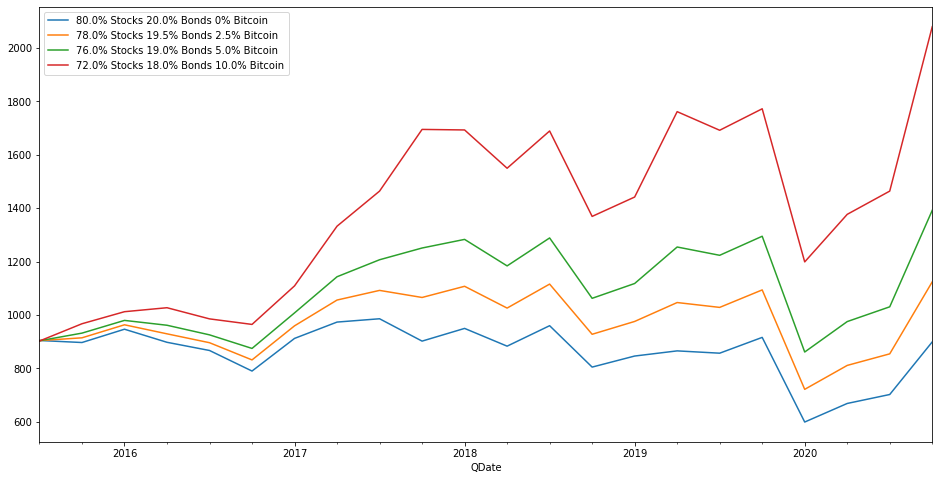

In [23]:
bitcoin_80_1.plot(figsize=(16,8))

### 2.2.2 Портфель акции/облигации в соотношении 70/30 в сочетании с биткоином

In [24]:
bitcoin_70_1, bitcoin_70_2 = main_func(s_b_bitcoin, alt_asset_name = 'Bitcoin', stock_share = 0.7)

#### Инвестиционные характеристики портфелей, 1 Июля 2015 - 31 декабря 2020

In [25]:
bitcoin_70_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
70.0% Stocks 30.0% Bonds 0% Bitcoin,-7.55,-1.42,23.95,-0.26,-36.35
68.25% Stocks 29.25% Bonds 2.5% Bitcoin,15.5,2.65,24.61,-0.09,-32.87
66.5% Stocks 28.5% Bonds 5.0% Bitcoin,42.92,6.71,25.86,0.06,-32.34
63.0% Stocks 27.0% Bonds 10.0% Bitcoin,113.25,14.76,29.76,0.31,-31.27


#### Индекс полной доходности, 1000 - базовое значение, 1 Июля 2015 - 31 декабря 2020

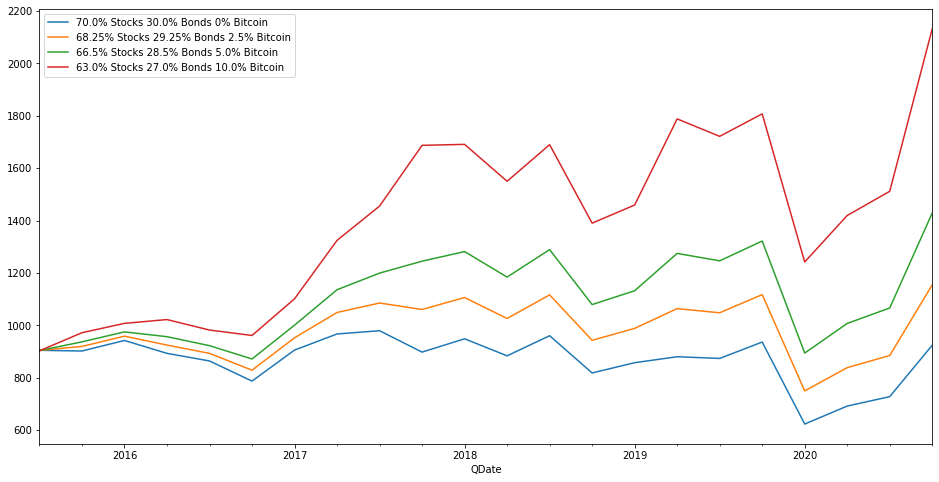

In [26]:
bitcoin_70_1.plot(figsize=(16,8))

### 2.2.3 Портфель акции/облигации в соотношении 60/40 в сочетании с биткоином

In [27]:
bitcoin_60_1, bitcoin_60_2 = main_func(s_b_bitcoin, alt_asset_name = 'Bitcoin', stock_share = 0.6)

#### Инвестиционные характеристики портфелей, 1 Июля 2015 - 31 декабря 2020

In [28]:
bitcoin_60_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
60.0% Stocks 40.0% Bonds 0% Bitcoin,-5.02,-0.93,23.09,-0.25,-33.35
58.5% Stocks 39.0% Bonds 2.5% Bitcoin,18.57,3.15,23.78,-0.08,-31.69
57.0% Stocks 38.0% Bonds 5.0% Bitcoin,46.61,7.2,25.06,0.08,-31.19
54.0% Stocks 36.0% Bonds 10.0% Bitcoin,118.47,15.27,29.07,0.34,-30.18


#### Индекс полной доходности, 1000 - базовое значение, 1 Июля 2015 - 31 декабря 2020

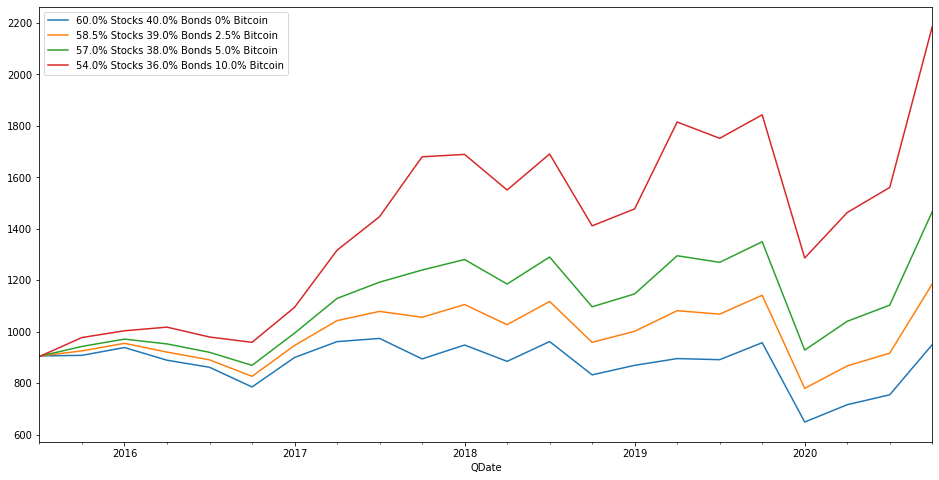

In [29]:
bitcoin_60_1.plot(figsize=(16,8))

### 2.2.4 Портфель акции/облигации в соотношении 50/50 в сочетании с биткоином

In [30]:
bitcoin_50_1, bitcoin_50_2 = main_func(s_b_bitcoin, alt_asset_name = 'Bitcoin', stock_share = 0.5)

#### Инвестиционные характеристики портфелей, 1 Июля 2015 - 31 декабря 2020

In [31]:
bitcoin_50_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
50.0% Stocks 50.0% Bonds 0% Bitcoin,-2.52,-0.46,22.26,-0.24,-30.98
48.75% Stocks 48.75% Bonds 2.5% Bitcoin,21.62,3.62,22.97,-0.06,-30.51
47.5% Stocks 47.5% Bonds 5.0% Bitcoin,50.29,7.69,24.29,0.11,-30.04
45.0% Stocks 45.0% Bonds 10.0% Bitcoin,123.67,15.76,28.4,0.36,-29.09


#### Индекс полной доходности, 1000 - базовое значение, 1 Июля 2015 - 31 декабря 2020

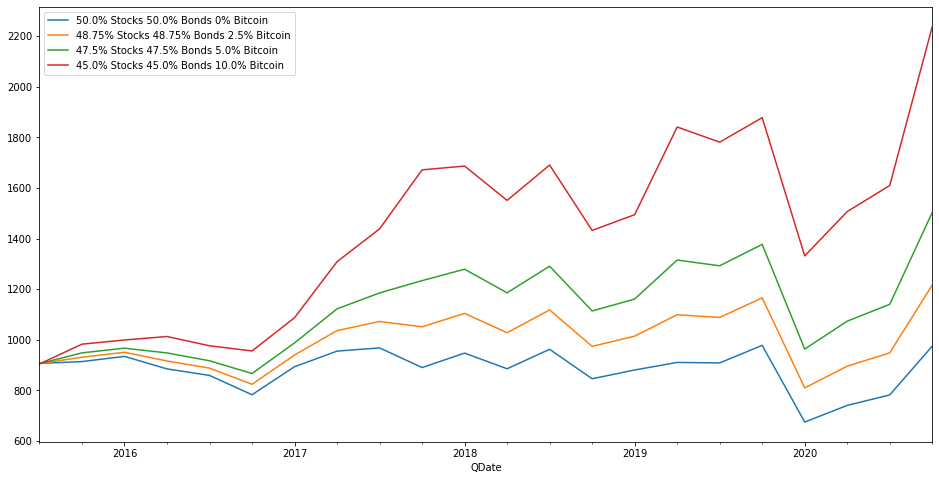

In [32]:
bitcoin_50_1.plot(figsize=(16,8))

### 2.2.5 Портфель акции/облигации в соотношении 40/60 в сочетании с биткоином

In [33]:
bitcoin_40_1, bitcoin_40_2 = main_func(s_b_bitcoin, alt_asset_name = 'Bitcoin', stock_share = 0.4)

#### Инвестиционные характеристики портфелей, 1 Июля 2015 - 31 декабря 2020

In [34]:
bitcoin_40_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
40.0% Stocks 60.0% Bonds 0% Bitcoin,-0.03,-0.01,21.46,-0.23,-29.77
39.0% Stocks 58.5% Bonds 2.5% Bitcoin,24.64,4.09,22.18,-0.04,-29.33
38.0% Stocks 57.0% Bonds 5.0% Bitcoin,53.93,8.16,23.54,0.13,-28.88
36.0% Stocks 54.0% Bonds 10.0% Bitcoin,128.83,16.24,27.76,0.39,-28


#### Индекс полной доходности, 1000 - базовое значение, 1 Июля 2015 - 31 декабря 2020

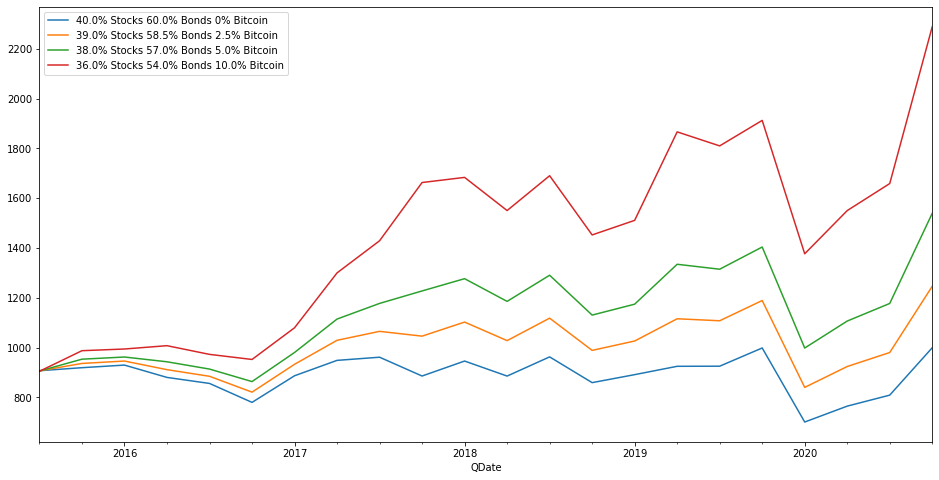

In [35]:
bitcoin_40_1.plot(figsize=(16,8))

### 2.2.6 Комментарии

- Особенность добавления биткоина в портфель заключается в том, что при этом наблюдается значительный рост доходности (с 0% до 128%), однако волатильность портфеля также возрастает. При этом рост доходности более значим, о чем говорит выход коэффициента Шарпа в положительную зону (с -0.23 до 0.39). *Цифры приведены для сочетания акции/облигации 40/60
- Примечательно, что величина максимальной просадки снижается с увеличением доли биткоина. В целом, можно сделать вывод о значительном улучшении инвестиционных характеристик при добавлении биткоина в портфель в любых количествах.

## 2.3 Палладий в сочетании с акциями и облигациями

### 2.3.1 Портфель акции/облигации в соотношении 80/20 в сочетании с палладием

In [36]:
palladium_80_1, palladium_80_2 = main_func(s_b_palladium, alt_asset_name = 'Palladium', stock_share = 0.8)

#### Инвестиционные характеристики портфелей, 1 января 2012 - 31 декабря 2020

In [37]:
palladium_80_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
80.0% Stocks 20.0% Bonds 0% Palladium,-0.26,-0.03,20.99,-0.23,-50.9
78.0% Stocks 19.5% Bonds 2.5% Palladium,4.25,0.46,20.43,-0.22,-48.1
76.0% Stocks 19.0% Bonds 5.0% Palladium,8.87,0.95,19.89,-0.2,-45.18
72.0% Stocks 18.0% Bonds 10.0% Palladium,18.46,1.9,18.84,-0.16,-38.97


#### Индекс полной доходности, 1000 - базовое значение, 1 января 2012 - 31 декабря 2020

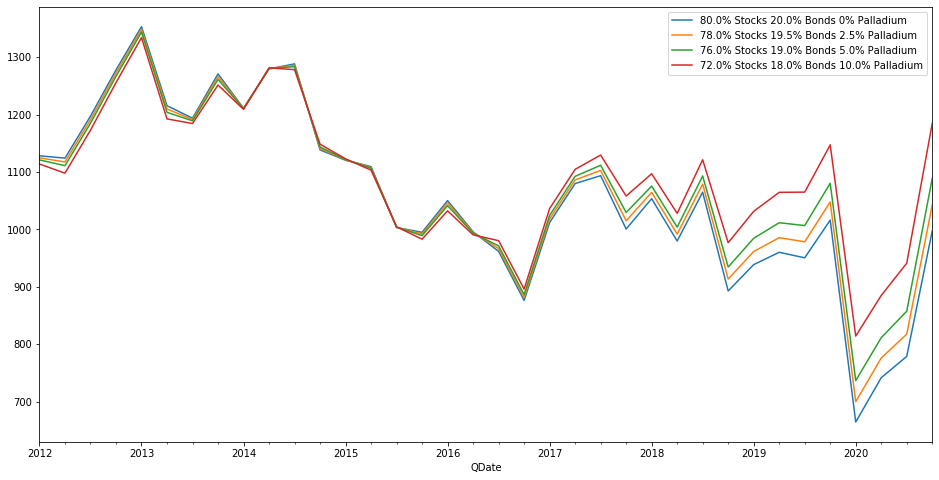

In [38]:
palladium_80_1.plot(figsize=(16,8))

### 2.3.2 Портфель акции/облигации в соотношении 70/30 в сочетании с палладием

In [39]:
palladium_70_1, palladium_70_2 = main_func(s_b_palladium, alt_asset_name = 'Palladium', stock_share = 0.7)

#### Инвестиционные характеристики портфелей, 1 января 2012 - 31 декабря 2020

In [40]:
palladium_70_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
70.0% Stocks 30.0% Bonds 0% Palladium,3.53,0.39,20.19,-0.22,-48.14
68.25% Stocks 29.25% Bonds 2.5% Palladium,8.04,0.86,19.66,-0.2,-45.29
66.5% Stocks 28.5% Bonds 5.0% Palladium,12.66,1.33,19.13,-0.19,-42.32
63.0% Stocks 27.0% Bonds 10.0% Palladium,22.22,2.25,18.13,-0.15,-36.02


#### Индекс полной доходности, 1000 - базовое значение, 1 января 2012 - 31 декабря 2020

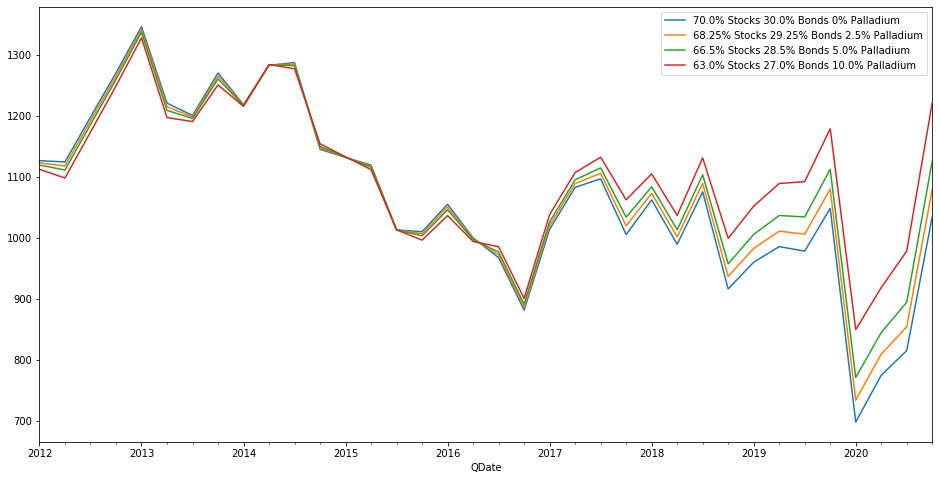

In [41]:
palladium_70_1.plot(figsize=(16,8))

### 2.3.3 Портфель акции/облигации в соотношении 60/40 в сочетании с палладием

In [42]:
palladium_60_1, palladium_60_2 = main_func(s_b_palladium, alt_asset_name = 'Palladium', stock_share = 0.6)

#### Инвестиционные характеристики портфелей, 1 января 2012 - 31 декабря 2020

In [43]:
palladium_60_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
60.0% Stocks 40.0% Bonds 0% Palladium,7.34,0.79,19.42,-0.21,-45.27
58.5% Stocks 39.0% Bonds 2.5% Palladium,11.84,1.25,18.9,-0.19,-42.38
57.0% Stocks 38.0% Bonds 5.0% Palladium,16.45,1.71,18.4,-0.17,-39.36
54.0% Stocks 36.0% Bonds 10.0% Palladium,25.98,2.6,17.45,-0.13,-32.98


#### Индекс полной доходности, 1000 - базовое значение, 1 января 2012 - 31 декабря 2020

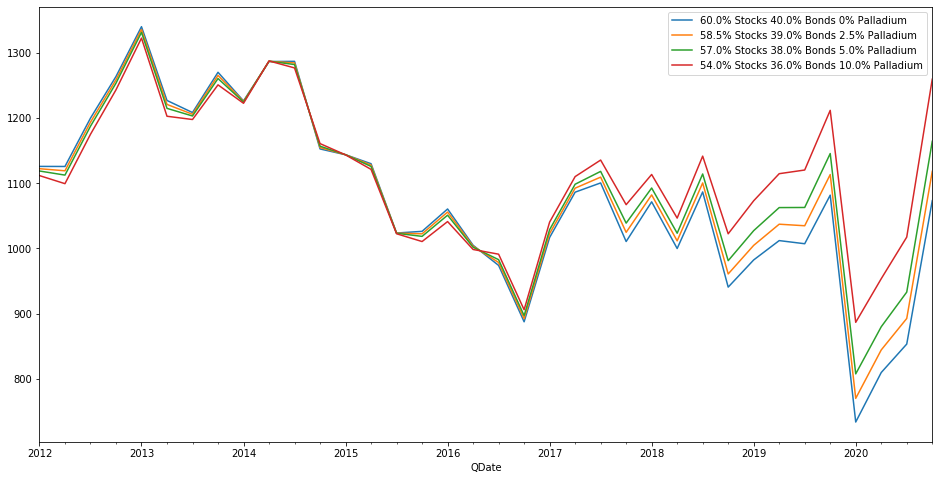

In [44]:
palladium_60_1.plot(figsize=(16,8))

### 2.3.4 Портфель акции/облигации в соотношении 50/50 в сочетании с палладием

In [45]:
palladium_50_1, palladium_50_2 = main_func(s_b_palladium, alt_asset_name = 'Palladium', stock_share = 0.5)

#### Инвестиционные характеристики портфелей, 1 января 2012 - 31 декабря 2020

In [46]:
palladium_50_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
50.0% Stocks 50.0% Bonds 0% Palladium,11.15,1.18,18.68,-0.2,-42.31
48.75% Stocks 48.75% Bonds 2.5% Palladium,15.64,1.63,18.18,-0.18,-39.37
47.5% Stocks 47.5% Bonds 5.0% Palladium,20.24,2.07,17.7,-0.16,-36.31
45.0% Stocks 45.0% Bonds 10.0% Palladium,29.74,2.94,16.8,-0.12,-30.88


#### Индекс полной доходности, 1000 - базовое значение, 1 января 2012 - 31 декабря 2020

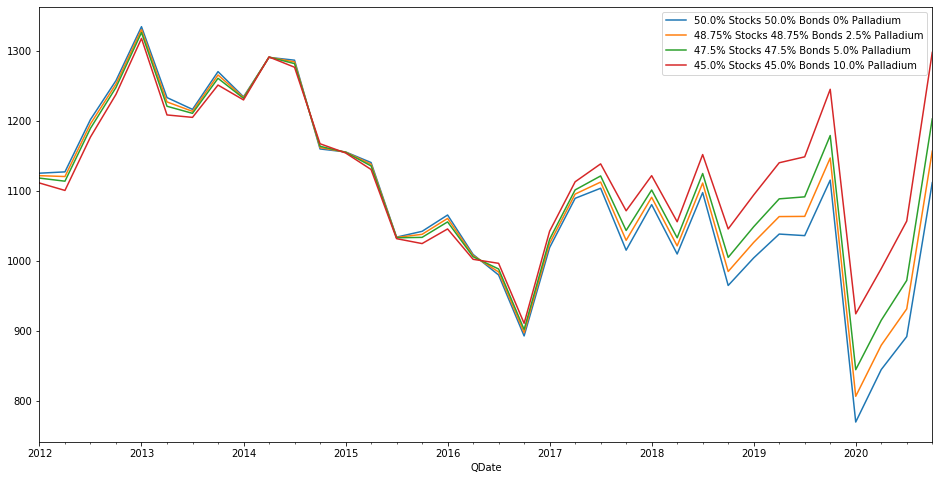

In [47]:
palladium_50_1.plot(figsize=(16,8))

### 2.3.5 Портфель акции/облигации в соотношении 60/40 в сочетании с палладием

In [48]:
palladium_40_1, palladium_40_2 = main_func(s_b_palladium, alt_asset_name = 'Palladium', stock_share = 0.4)

#### Инвестиционные характеристики портфелей, 1 января 2012 - 31 декабря 2020

In [49]:
palladium_40_2

,"Cumulative Return, %","Annualized Return, %","Volatility, %",Sharpe Ratio,"Maximum Drawdown, %"
40.0% Stocks 60.0% Bonds 0% Palladium,14.95,1.56,17.97,-0.19,-39.26
39.0% Stocks 58.5% Bonds 2.5% Palladium,19.44,1.99,17.5,-0.17,-36.27
38.0% Stocks 57.0% Bonds 5.0% Palladium,24.03,2.42,17.04,-0.15,-33.17
36.0% Stocks 54.0% Bonds 10.0% Palladium,33.48,3.26,16.18,-0.1,-30.26


#### Индекс полной доходности, 1000 - базовое значение, 1 января 2012 - 31 декабря 2020

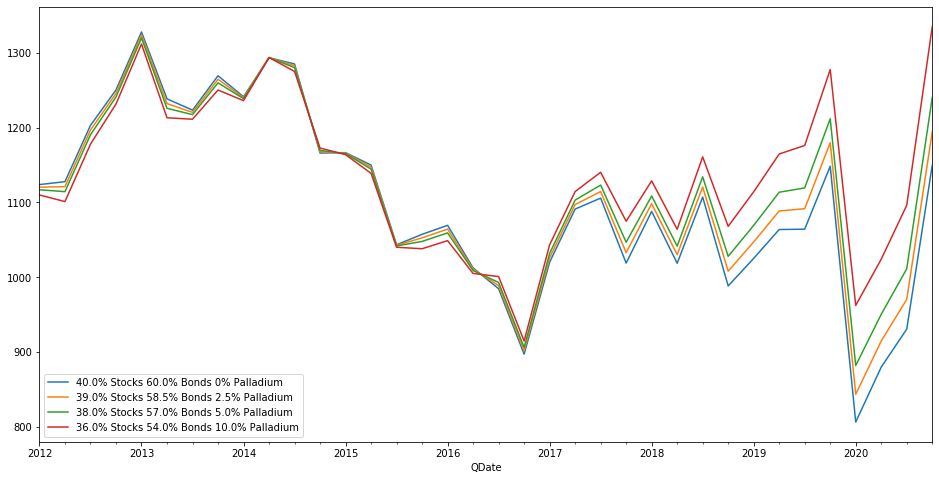

In [50]:
palladium_40_1.plot(figsize=(16,8))

### 2.3.6 Комментарии

- Добавление ETF на палладий в портфель оказывает на инвестиционные характеристике такое же по своей сути влияние, как и добавление золота, однако в силу меньшей корреляции с традиционным активами и более высокой доходности это влияние более значимо